In [71]:
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# กำหนดพาธของไฟล์
target = '../Satun-Phang-Nga/forcasting2/'
all_train_data = []
all_test_data = []

# วันที่สำหรับการทดสอบ
test_dates = pd.to_datetime([
    '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02'
])

# อ่านและแบ่งข้อมูล
for file in os.listdir(target):
    file_path = os.path.join(target, file)
    df = pd.read_excel(file_path, usecols=[
        'date', 'uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'disease', 'ETo', 'WE'
    ])
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    train_data = df[~df['date'].isin(test_dates)]
    test_data = df[df['date'].isin(test_dates)]
    
    all_train_data.append(train_data)
    all_test_data.append(test_data)

# รวมข้อมูลทั้งหมด
train_data_combined = pd.concat(all_train_data, ignore_index=True)
test_data_combined = pd.concat(all_test_data, ignore_index=True)

# แยกฟีเจอร์และเป้าหมาย
X_train = train_data_combined[['uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'ETo', 'WE']]
y_train = train_data_combined['disease']
X_test = test_data_combined[['uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'ETo', 'WE']]
y_test = test_data_combined['disease']

# สร้างโมเดล XGBoost
model = XGBRegressor()

# กำหนดพารามิเตอร์ที่ต้องการทดลอง
param_grid = {
    'objective': ['reg:squarederror','logistic','linear'],  # ทดสอบกับ objective เดียว
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 5, 10, 15, 20, 25],
    'subsample': [0.3, 0.5, 0.7, 0.9],
    'colsample_bylevel': [0.3, 0.5, 0.7],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [100, 250, 500, 1000, 10000]
}

# ใช้ GridSearchCV เพื่อค้นหาค่าที่ดีที่สุด
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# ฝึก GridSearchCV
grid_search.fit(X_train, y_train)

# ค่าพารามิเตอร์ที่ดีที่สุด
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# ใช้โมเดลที่ดีที่สุดในการทำนาย
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# คำนวณ MSE, RMSE, R² และ R² adjusted
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # จำนวนข้อมูล
p = X_test.shape[1]  # จำนวนฟีเจอร์
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Adjusted R²: {r2_adj}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 10000, 'objective': 'reg:squarederror', 'subsample': 0.5}
Mean Squared Error (MSE): 2.1579566312268974
Root Mean Squared Error (RMSE): 1.4689985130104446
R² Score: -0.07897841930389404
Adjusted R²: -0.5950115763622781


In [72]:
import os
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# กำหนดพาธของไฟล์
target = '../Satun-Phang-Nga/forcasting2/'
all_train_data = []
all_test_data = []

# วันที่สำหรับการทดสอบ
test_dates = pd.to_datetime([
    '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02'
])

# อ่านและแบ่งข้อมูล
for file in os.listdir(target):
    file_path = os.path.join(target, file)
    df = pd.read_excel(file_path, usecols=[
        'date', 'uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'disease', 'ETo', 'WE'
    ])
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    train_data = df[~df['date'].isin(test_dates)]
    test_data = df[df['date'].isin(test_dates)]
    
    all_train_data.append(train_data)
    all_test_data.append(test_data)

# รวมข้อมูลทั้งหมด
train_data_combined = pd.concat(all_train_data, ignore_index=True)
test_data_combined = pd.concat(all_test_data, ignore_index=True)

# แยกฟีเจอร์และเป้าหมาย
X_train = train_data_combined[['uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'ETo', 'WE']]
y_train = train_data_combined['disease']
X_test = test_data_combined[['uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'ETo', 'WE']]
y_test = test_data_combined['disease']

# สร้างโมเดล XGBoost
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.001,
    max_depth=5,
    subsample=0.5,
    colsample_bylevel=0.5,
    colsample_bytree=0.5,
    n_estimators=10000
)

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทำนายและประเมินผล
y_pred = model.predict(X_test)

# คำนวณ MSE, RMSE, R² และ R² adjusted
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # จำนวนข้อมูล
p = X_test.shape[1]  # จำนวนฟีเจอร์
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Adjusted R²: {r2_adj}")


Mean Squared Error (MSE): 2.1579566312268974
Root Mean Squared Error (RMSE): 1.4689985130104446
R² Score: -0.07897841930389404
Adjusted R²: -0.5950115763622781


In [73]:
import os
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# กำหนดพาธของไฟล์
target = '../Satun-Phang-Nga/forcasting2/'
all_train_data = []
all_test_data = []

# วันที่สำหรับการทดสอบ
test_dates = pd.to_datetime([
    '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02'
])

# อ่านและแบ่งข้อมูล
for file in os.listdir(target):
    file_path = os.path.join(target, file)
    df = pd.read_excel(file_path, usecols=[
        'date', 'uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'disease', 'ETo', 'WE'
    ])
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    train_data = df[~df['date'].isin(test_dates)]
    test_data = df[df['date'].isin(test_dates)]
    
    all_train_data.append(train_data)
    all_test_data.append(test_data)

# รวมข้อมูลทั้งหมด
train_data_combined = pd.concat(all_train_data, ignore_index=True)
test_data_combined = pd.concat(all_test_data, ignore_index=True)

# แยกฟีเจอร์และเป้าหมาย
X = train_data_combined[['uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'ETo', 'WE']]
y = train_data_combined['disease']

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล XGBoost
model = XGBRegressor()

# กำหนดพารามิเตอร์ที่ต้องการทดลอง
param_grid = {
    'objective': ['reg:squarederror'],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 500]
}

# ใช้ GridSearchCV เพื่อค้นหาค่าที่ดีที่สุด
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# ฝึก GridSearchCV
grid_search.fit(X_train, y_train)

# ค่าพารามิเตอร์ที่ดีที่สุด
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# ใช้โมเดลที่ดีที่สุดในการทำนาย
best_model = grid_search.best_estimator_

# ทำนายและประเมินผล
y_pred = best_model.predict(X_val)

# คำนวณ MSE, RMSE, R² และ R² adjusted
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
n = len(y_val)  # จำนวนข้อมูล
p = X_val.shape[1]  # จำนวนฟีเจอร์
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Adjusted R²: {r2_adj}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

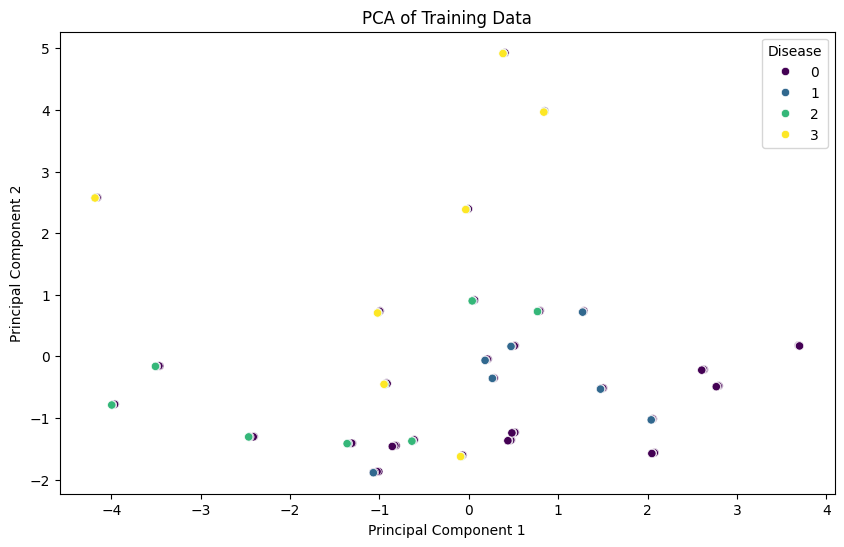

Original number of features: 11
Reduced number of features: 6


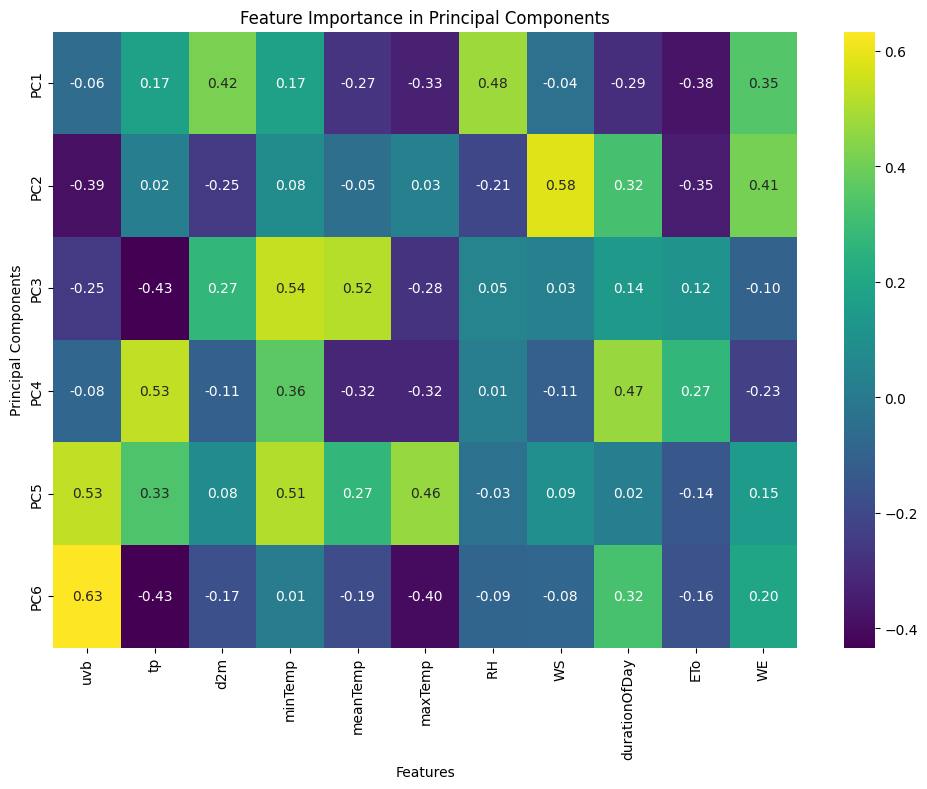

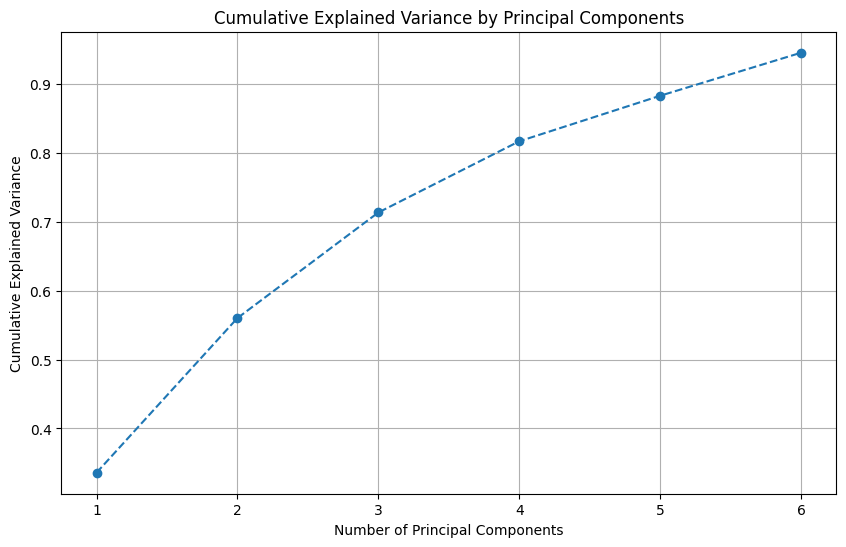

Mean Squared Error (MSE): 0.824617931783164
Root Mean Squared Error (RMSE): 0.908084760241666
R² Score: 0.04222148656845093
Adjusted R²: -0.23142951726913452


In [7]:
import os
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนดพาธของไฟล์
target = '../Satun-Phang-Nga/forcasting2/'
all_train_data = []
all_test_data = []

# วันที่สำหรับการทดสอบ
test_dates = pd.to_datetime([
    '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02'
])

# อ่านและแบ่งข้อมูล
for file in os.listdir(target):
    file_path = os.path.join(target, file)
    df = pd.read_excel(file_path, usecols=[
        'date', 'uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'disease', 'ETo', 'WE'
    ])
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    train_data = df[~df['date'].isin(test_dates)]
    test_data = df[df['date'].isin(test_dates)]
    
    all_train_data.append(train_data)
    all_test_data.append(test_data)

# รวมข้อมูลทั้งหมด
train_data_combined = pd.concat(all_train_data, ignore_index=True)
test_data_combined = pd.concat(all_test_data, ignore_index=True)

# แยกฟีเจอร์และเป้าหมาย
X = train_data_combined[['uvb', 'tp', 'd2m', 'minTemp', 'meanTemp', 'maxTemp', 'RH', 'WS', 'durationOfDay', 'ETo', 'WE']]
y = train_data_combined['disease']

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# สเกลฟีเจอร์
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ใช้ PCA เพื่อลดมิติ
pca = PCA(n_components=0.95)  # รักษาข้อมูล 95% ของ variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")

# สร้างกราฟแสดงความสำคัญของฟีเจอร์ในแต่ละ Principal Component
components = pd.DataFrame(pca.components_, columns=X.columns)
pca_feature_importance = components.T
pca_feature_importance.columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_feature_importance['Feature'] = X.columns

plt.figure(figsize=(12, 8))
sns.heatmap(pca_feature_importance.set_index('Feature').T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Feature Importance in Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# Plot variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# สร้างโมเดล XGBoost
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.001,
    max_depth=5,
    subsample=0.5,
    colsample_bylevel=0.5,
    colsample_bytree=0.5,
    n_estimators=1000  # ลดจำนวนต้นไม้ลงเพื่อการทดสอบ
)

# ฝึกโมเดล
model.fit(X_train_pca, y_train)

# ทำนายและประเมินผล
y_pred = model.predict(X_val_pca)

# คำนวณ MSE, RMSE, R² และ R² adjusted
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
n = len(y_val)  # จำนวนข้อมูล
p = X_val_pca.shape[1]  # จำนวนฟีเจอร์
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Adjusted R²: {r2_adj}")
